In [4]:
%pylab inline
import pandas as pd
import seaborn as se
import datetime

Populating the interactive namespace from numpy and matplotlib


In [2]:
data = pd.read_csv('uber-raw-data-apr14.csv')

In [13]:
data.head() 

,Date/Time,Lat,Lon,Base
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512


In [11]:
data['Date/Time'] = data['Date/Time'].map(pd.to_datetime)

In [21]:
def get_dom(dt):
    return dt.day
def get_weekday(dt):
    return dt.weekday()
def get_hour(dt):
    return dt.hour

data['dom'] = data['Date/Time'].map(get_dom)
data['weekday'] = data['Date/Time'].map(get_weekday)
data['hour'] = data['Date/Time'].map(get_hour)
data.tail() 

,Date/Time,Lat,Lon,Base,dom,weekday,hour
564511,2014-04-30 23:22:00,40.7640,-73.9744,B02764,30,2,23
564512,2014-04-30 23:26:00,40.7629,-73.9672,B02764,30,2,23
564513,2014-04-30 23:31:00,40.7443,-73.9889,B02764,30,2,23
564514,2014-04-30 23:32:00,40.6756,-73.9405,B02764,30,2,23
564515,2014-04-30 23:48:00,40.6880,-73.9608,B02764,30,2,23


## Analyse based on DOM

Text(0.5, 1.0, 'Hist for date of month')

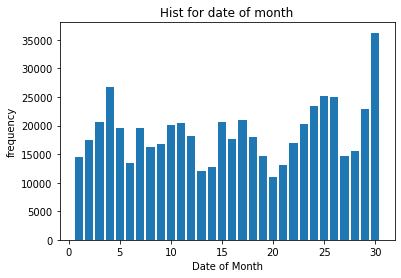

In [26]:
hist(data.dom, bins=30, rwidth=.8, range=(0.5, 30.5))
xlabel('Date of Month')
ylabel('frequency')
title('Hist for date of month')

In [27]:
def count_rows(rows):
    return len(rows)

by_date = data.groupby('dom').apply(count_rows)

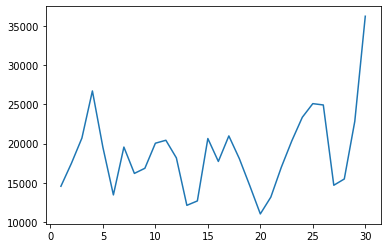

In [31]:
plot(by_date)

<BarContainer object of 30 artists>

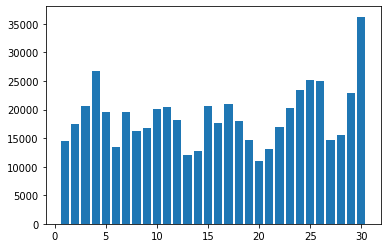

In [32]:
bar(range(1, 31), by_date)

In [33]:
by_date_sorted = by_date.sort_values()

([<matplotlib.axis.XTick at 0x11c5928d0>,
 [Text(0, 0, '20'),
  Text(0, 0, '13'),
  Text(0, 0, '14'),
  Text(0, 0, '21'),
  Text(0, 0, '6'),
  Text(0, 0, '1'),
  Text(0, 0, '19'),
  Text(0, 0, '27'),
  Text(0, 0, '28'),
  Text(0, 0, '8'),
  Text(0, 0, '9'),
  Text(0, 0, '22'),
  Text(0, 0, '2'),
  Text(0, 0, '16'),
  Text(0, 0, '18'),
  Text(0, 0, '12'),
  Text(0, 0, '5'),
  Text(0, 0, '7'),
  Text(0, 0, '10'),
  Text(0, 0, '23'),
  Text(0, 0, '11'),
  Text(0, 0, '15'),
  Text(0, 0, '3'),
  Text(0, 0, '17'),
  Text(0, 0, '29'),
  Text(0, 0, '24'),
  Text(0, 0, '26'),
  Text(0, 0, '25'),
  Text(0, 0, '4'),
  Text(0, 0, '30')])

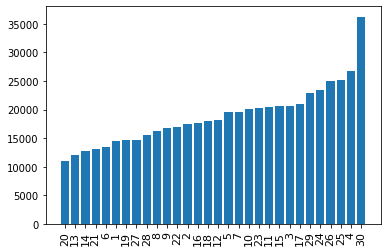

In [41]:
bar(range(1, 31), by_date_sorted, )
xticks(range(1,31), by_date_sorted.index, rotation='vertical' , size=11)

## Analyse based on hour

Text(0.5, 1.0, 'Hist for Hour')

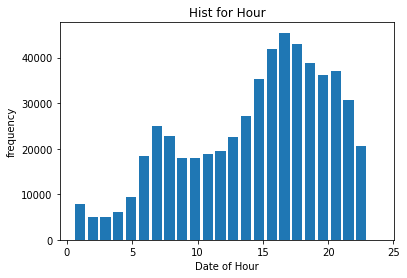

In [44]:
hist(data.hour, bins=24, rwidth=.8, range=(0.5, 24))
xlabel('Date of Hour')
ylabel('frequency')
title('Hist for Hour')

## Analyse the Weekday


Text(0.5, 1.0, 'Hist for Weekday')

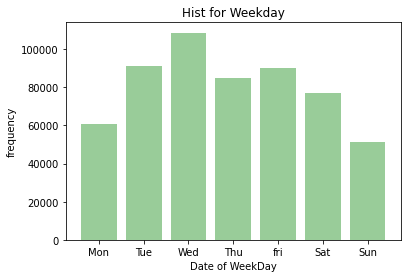

In [57]:
hist(data.weekday, bins=7, rwidth=.8, range=(-0.5, 6.5), alpha=0.4, color='green')
xticks(range(7), 'Mon Tue Wed Thu fri Sat Sun'.split())
xlabel('Date of WeekDay')
ylabel('frequency')
title('Hist for Weekday')

### Cross Analysis (hour and date of week)

In [58]:
data.head()

,Date/Time,Lat,Lon,Base,dom,weekday,hour
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,1,1,0
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,1,1,0
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,1,1,0
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,1,1,0
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,1,1,0


In [66]:
cross_h_w = data.groupby('weekday hour'.split()).apply(count_rows).unstack()

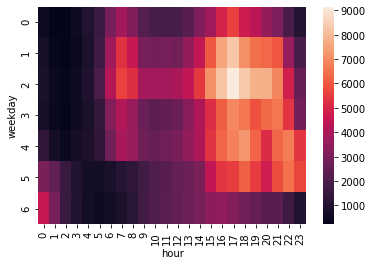

In [67]:
se.heatmap(cross_h_w)

### By lat and Lon

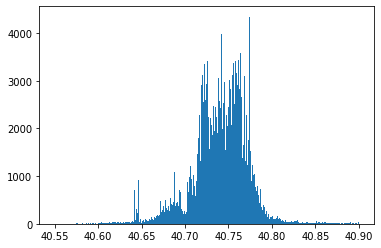

In [75]:
hist(data['Lat'], bins=1000, range=(40.55, 40.9));

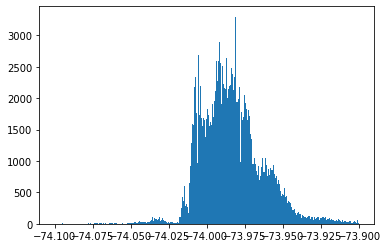

In [81]:
hist(data['Lon'], bins=1000,  range=(-74.1, -73.9));

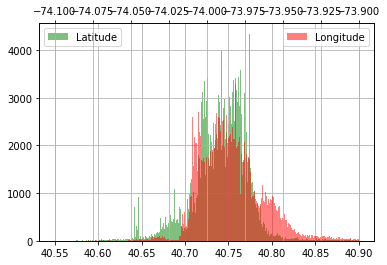

In [93]:
hist(data['Lat'], bins=1000, range=(40.55, 40.9), color='g', alpha=0.5, label='Latitude');
grid()
legend(loc='upper left')
twiny()
hist(data['Lon'], bins=1000,  range=(-74.1, -73.9), color='r', alpha=0.5, label='Longitude');
grid()
legend(loc='best')

(0.0, 100.0)

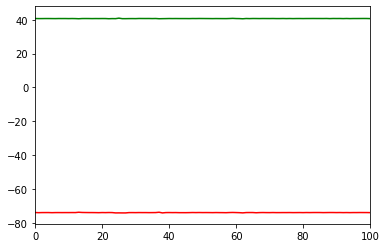

In [102]:
plot(data['Lat'], ms=20, color='g', label='lat')
plot(data['Lon'], ms=20, color='r', label='lon')
xlim(0,100)

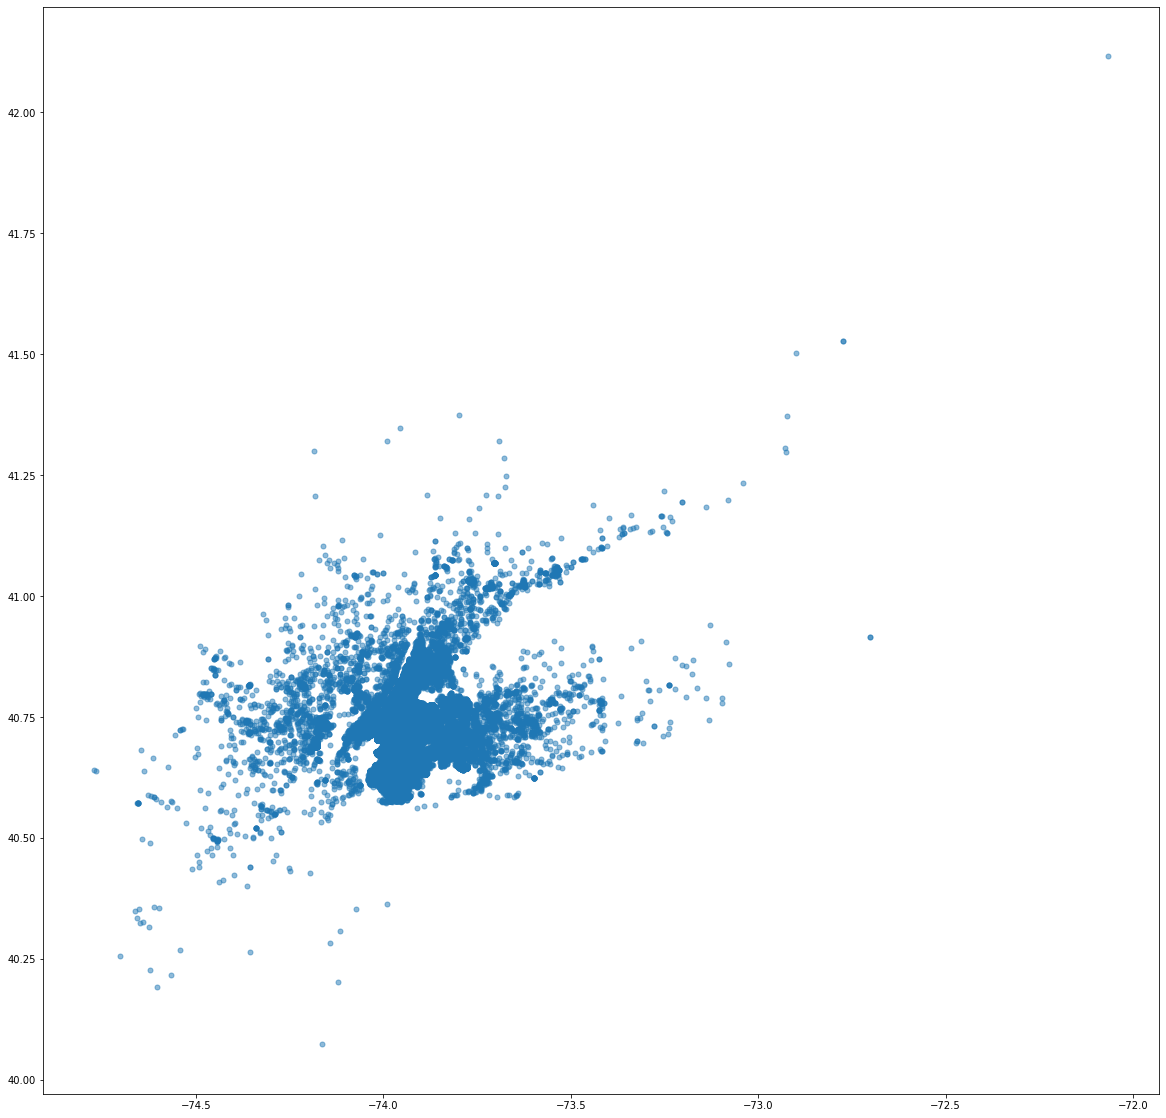

In [117]:
figure = figsize(20,20)
plot(data['Lon'], data['Lat'], '.', ms=10, alpha=.5)
